# Disambiguating overlapping regions in individual parcellations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import Functional_Fusion.dataset as ds
import ProbabilisticParcellation.util as ut
from copy import deepcopy
import ProbabilisticParcellation.learn_fusion_gpu as lf
import ProbabilisticParcellation.plot as ppp
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as sc
import ProbabilisticParcellation.export_atlas as ea
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.scripts.atlas_paper.symmetry as sm
import ProbabilisticParcellation.overlapping_regions as ov
import Functional_Fusion.dataset as ds
import HierarchBayesParcel.evaluation as ev
import Functional_Fusion.atlas_map as am
import SUITPy as suit
import nitools as nt
import nibabel as nb
import os
from scipy.stats import ttest_rel, ttest_ind


In [3]:
figure_path = "/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/papers/AtlasPaper/figure_parts/"
# figure_path = "/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/Talks/2023/06_Cerebellum_Reza/"

if not os.path.exists(figure_path):
    figure_path = "/Users/callithrix/Dropbox/AtlasPaper/figure_parts/"



In [4]:
mname = 'NettekovenSym32'
fmname = f'Models_03/{mname}_space-MNISymC2'
idx,color,label = nt.read_lut(f'{ut.export_dir}/{mname}.lut')

### Inspect parcel similarity / overlap
the functional similarity  (MDTB) and Spatial overlap to identify good candidate regions pairs)

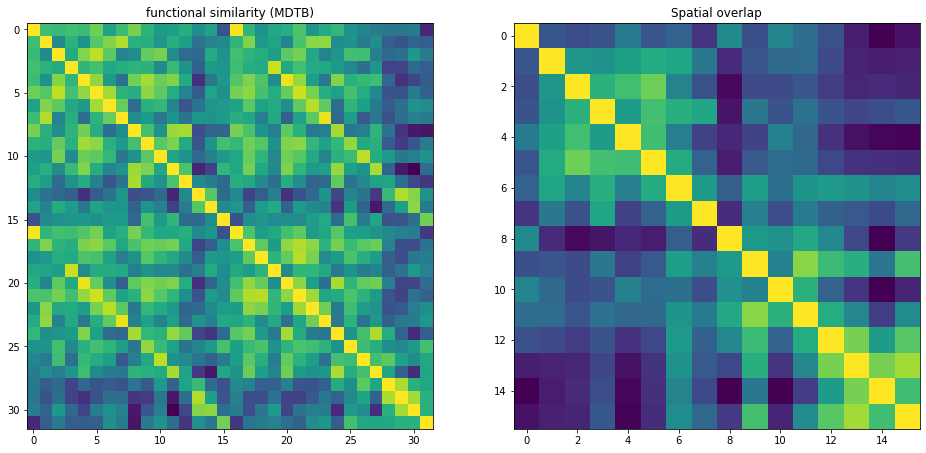

In [4]:
ov.inspect_region_overlap(fmname)

### Compare parcel-pair: D2 vs D4 

In [5]:
reg = [25,27]
print(f"{label[reg[0]+1]} vs {label[reg[1]+1]}")
D,dA,cA,vA,ind = ov.overlap_analysis(fmname,subj_n=np.arange(24),regions=reg)

D2R vs D4R


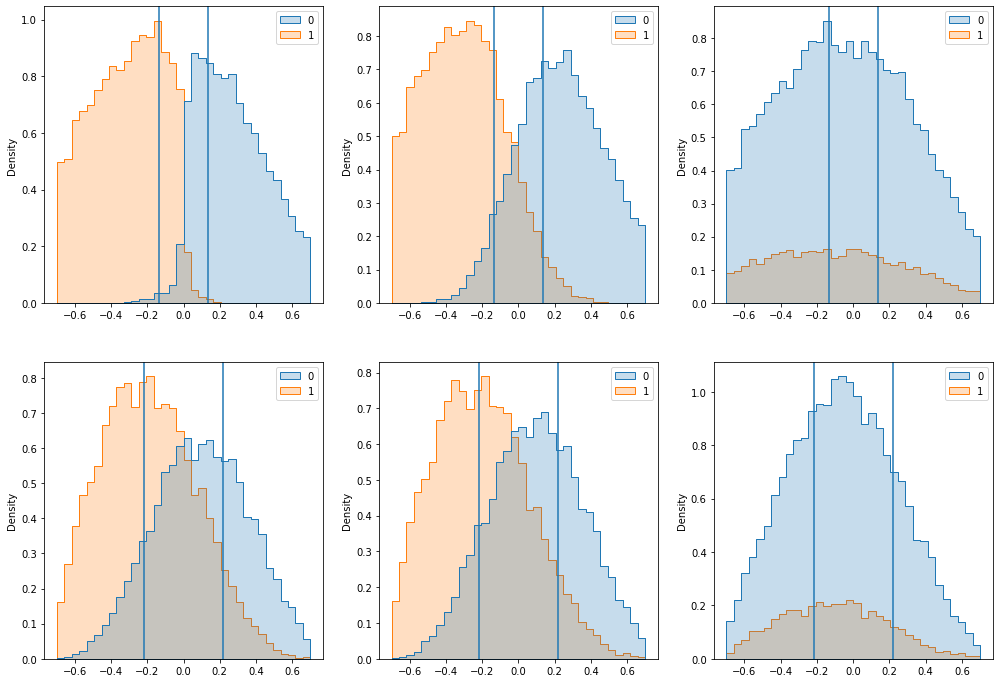

In [6]:
plt.figure(figsize=(17,12))    
for ds in range(2):
    for t in range(3):
        dA_plot = np.concatenate(dA[ds,t,:])
        ind_plot = np.concatenate(ind[ds,t,:])
        plt.subplot(2,3,ds*3+t+1)
        sb.histplot(x=dA_plot, hue=ind_plot, element='step',
            palette='tab10',
            bins=np.linspace(-0.7, 0.7, 35),
            stat='density', common_norm=True)
        plt.axvline(vA[ds,t,0] / 2)
        plt.axvline(-vA[ds,t,0] / 2)

t-test for difference in dprime: t(23)=12.837, p=0.000


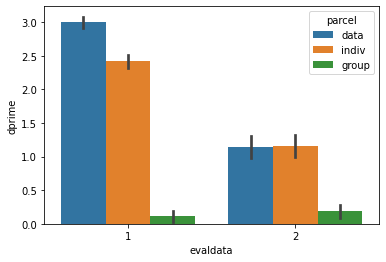

In [7]:
sb.barplot(data=D,x='evaldata',hue='parcel',y='dprime')
# Use only indepedent evaluation data
T=D[D.evaldata==2]
trel = ttest_rel(T[T.parcel=='indiv'].dprime,T[T.parcel=='group'].dprime)
print(f"t-test for difference in dprime: t(23)={trel.statistic:.3f}, p={trel.pvalue:.3f}")

### Compare S1 and S2 

In [7]:
plt.figure(figsize=(8, 8))
ppp.plot_parcel_prob('S1','NettekovenSym32',space='MNISymC2',backgroundcolor='w',bordercolor='k')
plt.savefig(figure_path + 'Prob_S1.png',bbox_inches='tight')



TypeError: plot_parcel_prob() got an unexpected keyword argument 'bordersize'

<Figure size 576x576 with 0 Axes>

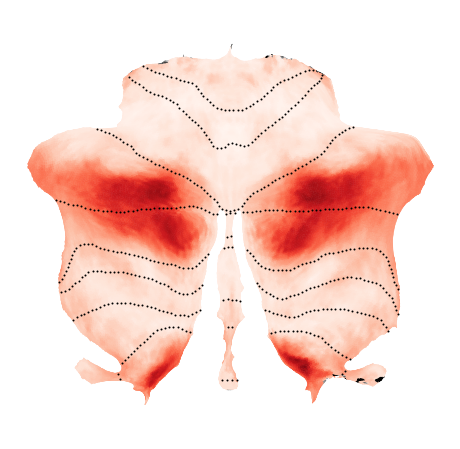

In [6]:
plt.figure(figsize=(8, 8))
ppp.plot_parcel_prob('S2','NettekovenSym32',space='MNISymC2',backgroundcolor='w')
plt.savefig(figure_path + 'Prob_S2.png',bbox_inches='tight')


In [19]:
reg = [28,29]
print(f"{label[reg[0]+1]} vs {label[reg[1]+1]}")
D,dA,cA,vA,ind = ov.overlap_analysis(fmname,subj_n=np.arange(24),regions=reg)

S1R vs S2R


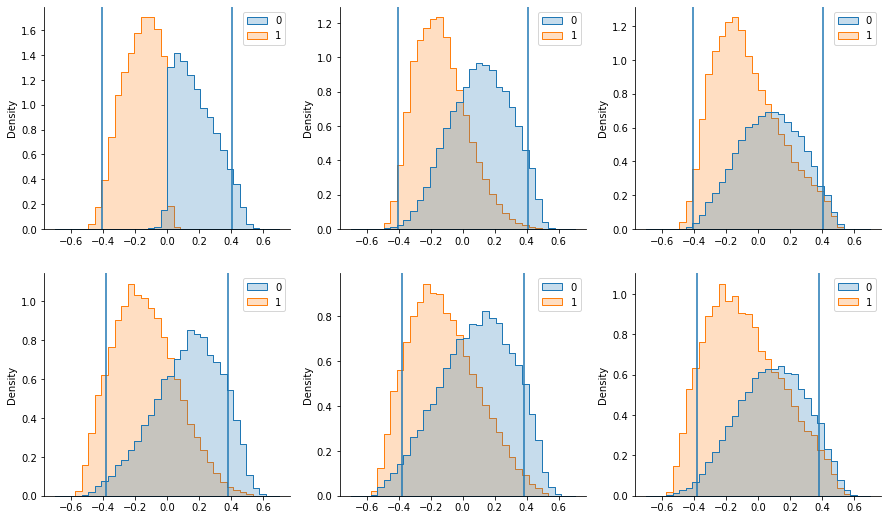

In [23]:
plt.figure(figsize=(15,9))    
for ds in range(2):
    for t in range(3):
        dA_plot = np.concatenate(dA[ds,t,:])
        ind_plot = np.concatenate(ind[ds,t,:])
        ax=plt.subplot(2,3,ds*3+t+1)
        sb.histplot(x=dA_plot, hue=ind_plot, element='step',
            palette='tab10',
            bins=np.linspace(-0.7, 0.7, 35),
            stat='density', common_norm=True)
        plt.axvline(vA[ds,t,0] / 2)
        plt.axvline(-vA[ds,t,0] / 2)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
plt.savefig(figure_path + 'Overlap_histogram.pdf',bbox_inches='tight')

t-test for difference in dprime: t(23)=3.279, p=0.003


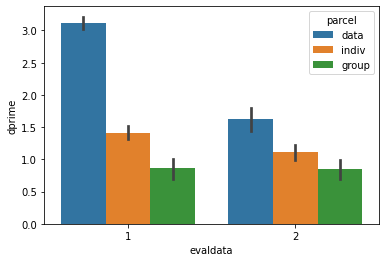

In [12]:
sb.barplot(data=D,x='evaldata',hue='parcel',y='dprime')
T=D[D.evaldata==2]
trel = ttest_rel(T[T.parcel=='indiv'].dprime,T[T.parcel=='group'].dprime)
print(f"t-test for difference in dprime: t(23)={trel.statistic:.3f}, p={trel.pvalue:.3f}")

### Compare M3 and A2 

In [13]:
reg = [18,21]
print(f"{label[reg[0]+1]} vs {label[reg[1]+1]}")
D,dA,cA,vA,ind = ov.overlap_analysis(fmname,subj_n=np.arange(24),regions=reg)

M3R vs A2R


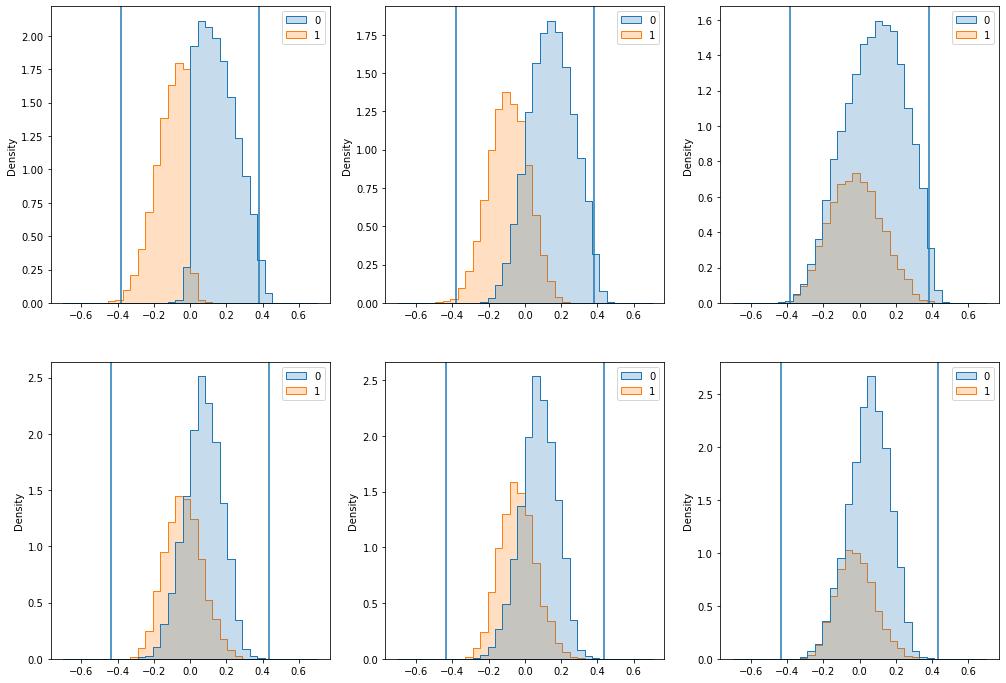

In [14]:
plt.figure(figsize=(17,12))    
for ds in range(2):
    for t in range(3):
        dA_plot = np.concatenate(dA[ds,t,:])
        ind_plot = np.concatenate(ind[ds,t,:])
        plt.subplot(2,3,ds*3+t+1)
        sb.histplot(x=dA_plot, hue=ind_plot, element='step',
            palette='tab10',
            bins=np.linspace(-0.4, 0.4, 35),
            stat='density', common_norm=True)
        plt.axvline(vA[ds,t,0] / 2)
        plt.axvline(-vA[ds,t,0] / 2)

t-test for difference in dprime: t(23)=7.654, p=0.000


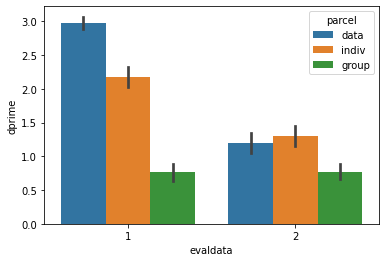

In [15]:
sb.barplot(data=D,x='evaldata',hue='parcel',y='dprime')
T=D[D.evaldata==2]
trel = ttest_rel(T[T.parcel=='indiv'].dprime,T[T.parcel=='group'].dprime)
print(f"t-test for difference in dprime: t(23)={trel.statistic:.3f}, p={trel.pvalue:.3f}")